#  Part 1: Fetch 1-year stock data using yfinance

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


In [2]:
ticker = "AAPL"  
data = yf.download(ticker, period="1y")
data.head()


YF.download() has changed argument auto_adjust default to True



*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-07-31,221.046234,222.778140,219.602987,220.409214,50036300
2024-08-01,217.343552,223.435059,216.009793,223.325570,62501000
2024-08-02,218.836563,224.549849,216.696577,218.129861,105568600
2024-08-05,208.295853,212.506158,195.087620,198.163233,119548600
2024-08-06,206.265350,209.012512,200.134036,204.344342,69660500


#  Part 2: Linear Regression – Predict next day close price with MSE + plot

In [3]:
data["Next_Close"] = data["Close"].shift(-1)
data.dropna(inplace=True)


In [4]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = data[features]
y = data["Next_Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 6.863552905708908


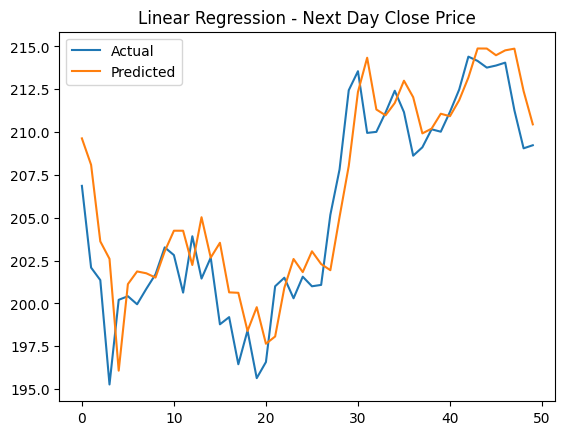

In [5]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Linear Regression - Next Day Close Price')
plt.show()


#  Part 3: Logistic Regression – Predict movement (up/down) + Confusion Matrix

In [6]:
import yfinance as yf
import pandas as pd

# Step 1: Download data
data = yf.download("AAPL", period="1y")

# Step 2: Fix 'Close' column by flattening it
close_series = pd.Series(data["Close"].values.squeeze(), index=data.index)

# Step 3: Shift to get Next_Close
next_close = close_series.shift(-1)

# Step 4: Drop last row to align
close_series = close_series.iloc[:-1]
next_close = next_close.iloc[:-1]

# Step 5: Binary target: 1 if next_close > close
target = (next_close > close_series).astype(int)

# Step 6: Final DataFrame
final_df = pd.DataFrame({
    "Close": close_series,
    "Next_Close": next_close,
    "Target": target
})

# Step 7: View result
print(final_df.tail())


[*********************100%***********************]  1 of 1 completed

                 Close  Next_Close  Target
Date                                      
2025-07-24  213.759995  213.880005       1
2025-07-25  213.880005  214.050003       1
2025-07-28  214.050003  211.270004       0
2025-07-29  211.270004  209.050003       0
2025-07-30  209.050003  209.199997       1


[*********************100%***********************]  1 of 1 completed

 Accuracy: 0.44
Confusion Matrix:
 [[ 0 21]
 [ 7 22]]


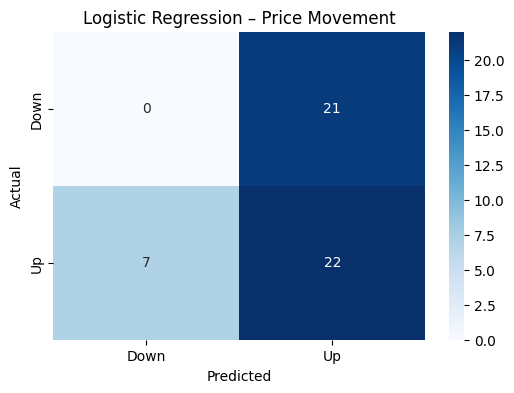

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Fetch data
raw_data = yf.download("AAPL", period="1y")

# Step 2: Convert 'Close' column to 1D Series
close_series = raw_data["Close"].squeeze()

# Step 3: Shift Close to create Next_Close
next_close = close_series.shift(-1)

# Step 4: Drop last row to align
close_series = close_series.iloc[:-1]
next_close = next_close.iloc[:-1]

# Step 5: Target = 1 if price goes up, else 0
target = (next_close > close_series).astype(int)

# Step 6: Rebuild the DataFrame with all proper columns
data = raw_data.iloc[:-1].copy()  # match the aligned close/next_close/target
data["Close"] = close_series      # flatten Close
data["Next_Close"] = next_close
data["Target"] = target

# Step 7: Logistic Regression
features = ["Open", "High", "Low", "Close", "Volume"]
X = data[features]
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 8: Evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(" Accuracy:", acc)
print("Confusion Matrix:\n", cm)

# Step 9: Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression – Price Movement")
plt.show()


#  Part 4:	KNN Classifier with k = 3, 5, 7 + Best model heatmap


 KNN Accuracy for Different K Values:
K = 3, Accuracy = 0.5000
K = 5, Accuracy = 0.5200
K = 7, Accuracy = 0.4800
K = 9, Accuracy = 0.5400

 Best K = 9 with Accuracy = 0.5400
Confusion Matrix:
 [[ 9 12]
 [11 18]]


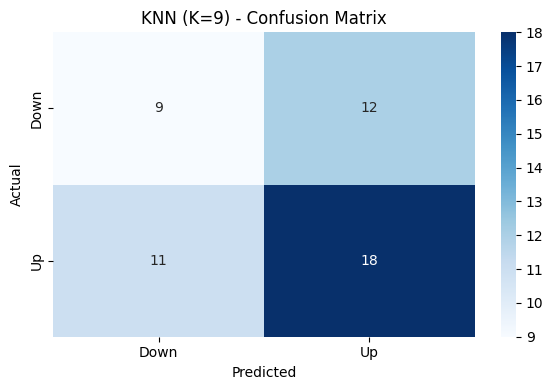

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate different K values and track best
best_k = None
best_acc = 0
best_pred = None

print("\n KNN Accuracy for Different K Values:")
for k in [3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_knn)
    print(f"K = {k}, Accuracy = {acc:.4f}")

    if acc > best_acc:
        best_k = k
        best_acc = acc
        best_pred = y_pred_knn

# Show best K results
print(f"\n Best K = {best_k} with Accuracy = {best_acc:.4f}")
cm = confusion_matrix(y_test, best_pred)
print("Confusion Matrix:\n", cm)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"KNN (K={best_k}) - Confusion Matrix")
plt.tight_layout()
plt.show()


# CNN model for Stock Price Prediction (Regression)


C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 9, 64)               │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 3, 32)               │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           1,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,533 (25.52 KB)

 Trainable params: 6,533 (25.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 51626.1523 - val_loss: 42012.4453
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 51321.6289 - val_loss: 41677.1719
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 50365.8359 - val_loss: 40883.6445
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48210.7188 - val_loss: 39144.9727
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44816.6641 - val_loss: 35716.3867
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38385.0195 - val_loss: 29706.0488
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27254.7520 - val_loss: 20828.3457
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14551.0391 - val_loss: 10617.6885
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4301.4731 - val_loss: 3881.4307
Epoch 10/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2948.4263 - val_loss: 3316.0979
Epoch 11/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2359.6992 - val_loss: 4

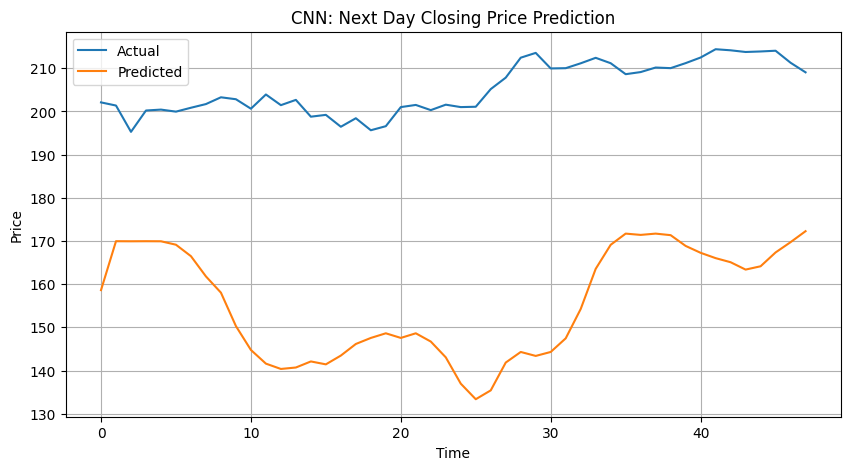

In [9]:
# STEP 0: Install packages (if not already installed)
# !pip install yfinance tensorflow numpy==1.23.5

# STEP 1: Import packages
import numpy as np
np.bool = bool  # PATCH for compatibility if using TF < 2.11

import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout

# STEP 2: Download and prepare data
ticker = "AAPL"
data = yf.download(ticker, period="1y")

data["Next_Close"] = data["Close"].shift(-1)
data.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])

# STEP 3: Create windowed input for CNN
window_size = 10
X_cnn, y_cnn = [], []

for i in range(window_size, len(scaled_data) - 1):
    X_cnn.append(scaled_data[i - window_size:i])
    y_cnn.append(data["Next_Close"].values[i])

X_cnn = np.array(X_cnn)
y_cnn = np.array(y_cnn)

# STEP 4: Train-test split
split = int(0.8 * len(X_cnn))
X_train, X_test = X_cnn[:split], X_cnn[split:]
y_train, y_test = y_cnn[:split], y_cnn[split:]

# STEP 5: Build CNN model
model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(window_size, len(features))),
    MaxPooling1D(pool_size=2),
    Conv1D(32, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# STEP 6: Train model
model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# STEP 7: Evaluate and plot
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
print(" CNN Model - MSE:", mse)

plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("CNN: Next Day Closing Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()



C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 29, 64)              │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 13, 32)              │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           9,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,533 (56.77 KB)

 Trainable params: 14,533 (56.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.4614 - val_loss: 0.0071
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0547 - val_loss: 0.0058
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0406 - val_loss: 0.0112
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0423 - val_loss: 0.0055
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0358 - val_loss: 0.0069
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0332 - val_loss: 0.0053
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0301 - val_loss: 0.0054
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0277 - val_loss: 0.0051
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0343 - val_loss: 0.0051
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0315 - val_loss: 0.0048
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0300 - val_loss: 0.0048
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0339 - val_l

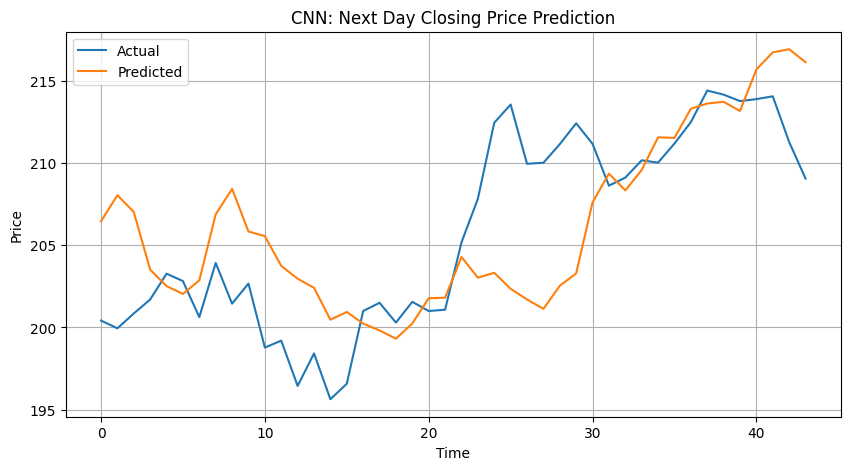

In [10]:
# STEP 0: Install if needed (Uncomment in Colab or Jupyter)
# !pip install yfinance tensorflow numpy==1.23.5

# STEP 1: Imports and compatibility fix
import numpy as np
np.bool = bool  # Fix for TensorFlow compatibility (if needed)

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout

# STEP 2: Download stock data
ticker = "AAPL"  # You can also try "TCS.NS", "RELIANCE.NS"
data = yf.download(ticker, period="1y", auto_adjust=True)

# STEP 3: Prepare target variable
data["Next_Close"] = data["Close"].shift(-1)
data.dropna(inplace=True)

# STEP 4: Feature scaling
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X_raw = data[features]
y_raw = data[["Next_Close"]]

# Scale features
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X_raw)

# Scale target
target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y_raw)

# STEP 5: Create sequences for CNN
window_size = 30
X_cnn, y_cnn = [], []

for i in range(window_size, len(X_scaled) - 1):
    X_cnn.append(X_scaled[i - window_size:i])
    y_cnn.append(y_scaled[i])

X_cnn = np.array(X_cnn)
y_cnn = np.array(y_cnn)

# STEP 6: Train-test split
split = int(0.8 * len(X_cnn))
X_train, X_test = X_cnn[:split], X_cnn[split:]
y_train, y_test = y_cnn[:split], y_cnn[split:]

# STEP 7: Build CNN model
model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(window_size, len(features))),
    MaxPooling1D(pool_size=2),
    Conv1D(32, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# STEP 8: Train model
model.fit(X_train, y_train, epochs=60, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# STEP 9: Predict and inverse scale
y_pred_scaled = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred_scaled)
y_test_unscaled = target_scaler.inverse_transform(y_test)

# STEP 10: Evaluate
mse = mean_squared_error(y_test_unscaled, y_pred)
print(" CNN Model - MSE:", mse)

# STEP 11: Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test_unscaled, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("CNN: Next Day Closing Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


 # LSTM Model for Next-Day Stock Price Prediction


C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2435 - val_loss: 0.0138
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0320 - val_loss: 0.0042
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0233 - val_loss: 0.0058
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0241 - val_loss: 0.0027
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0246 - val_loss: 0.0029
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0174 - val_loss: 0.0026
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0179 - val_loss: 0.0027
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0205 - val_loss: 0.0027
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0169 - val_loss: 0.0024
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0185 - val_loss: 0.0025
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0205 - val_loss: 0.0032
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0

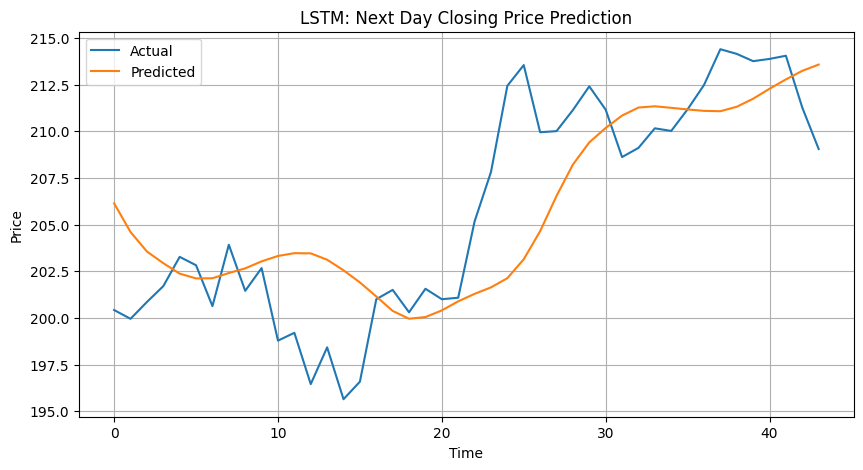

In [12]:
# STEP 1: Imports and compatibility
import numpy as np
np.bool = bool

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# STEP 2: Download stock data
ticker = "AAPL"  # Change to "TCS.NS", "RELIANCE.NS", etc. if needed
data = yf.download(ticker, period="1y", auto_adjust=True)

# STEP 3: Create target
data["Next_Close"] = data["Close"].shift(-1)
data.dropna(inplace=True)

# STEP 4: Scale features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X_raw = data[features]
y_raw = data[["Next_Close"]]

data["SMA_10"] = data["Close"].rolling(window=10).mean()
data["EMA_10"] = data["Close"].ewm(span=10, adjust=False).mean()
data["Returns"] = data["Close"].pct_change()

feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

X_scaled = feature_scaler.fit_transform(X_raw)
y_scaled = target_scaler.fit_transform(y_raw)

# STEP 5: Create sequences
window_size = 30  # higher than 10 for better pattern recognition
X_seq, y_seq = [], []
for i in range(window_size, len(X_scaled) - 1):
    X_seq.append(X_scaled[i-window_size:i])
    y_seq.append(y_scaled[i])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)

# STEP 6: Train-test split
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

# STEP 7: Define LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window_size, len(features))),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# STEP 8: Train
model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# STEP 9: Predict and inverse scale
y_pred_scaled = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred_scaled)
y_test_unscaled = target_scaler.inverse_transform(y_test)

# STEP 10: Evaluate and plot
mse = mean_squared_error(y_test_unscaled, y_pred)
print(" LSTM Model - MSE:", mse)

plt.figure(figsize=(10, 5))
plt.plot(y_test_unscaled, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("LSTM: Next Day Closing Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()
